# Data preparation exercises

The end result of this exercise should be a file named prepare.py.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#from env import get_connection

## PT 1

Using your store items data:

1. Convert date column to datetime format.
0. Plot the distribution of sale_amount and item_price.
0. Set the index to be the datetime variable.
0. Add a 'month' and 'day of week' column to your dataframe.
0. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate 0. functions and be able to re-run the functions and get the same results.

In [2]:
def create_index(df, date_col, datetime=True, index=True, sort=True):
    if datetime:
        df[date_col] = pd.to_datetime(df[date_col])
    if index:
        df = df.set_index(date_col)
    if sort:
        df = df.sort_values(date_col)
    return df

In [3]:
# Done in lesson

## PT 2

Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [4]:
power = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
power.columns = power.columns.str.lower()
power.columns = power.columns.str.replace('+', '_')

/var/folders/m4/_r30hp156kj90s9_qf1t1zvc0000gn/T/ipykernel_84535/345180664.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  power.columns = power.columns.str.replace('+', '_')


In [5]:
pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [6]:
power = create_index(power, 'date', True, True, True)
power.head()

,consumption,wind,solar,wind_solar
date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


### 1. Convert date column to datetime format.

In [7]:
power = pd.read_csv('opsd_germany_daily.csv')
power = create_index(power, 'date')
power.head()

,consumption,wind,solar,wind_solar
date,,,,
2006-01-01,1069.184,0.0,0.0,0.0
2006-01-02,1380.521,0.0,0.0,0.0
2006-01-03,1442.533,0.0,0.0,0.0
2006-01-04,1457.217,0.0,0.0,0.0
2006-01-05,1477.131,0.0,0.0,0.0


### 2. Plot the distribution of each of your variables.

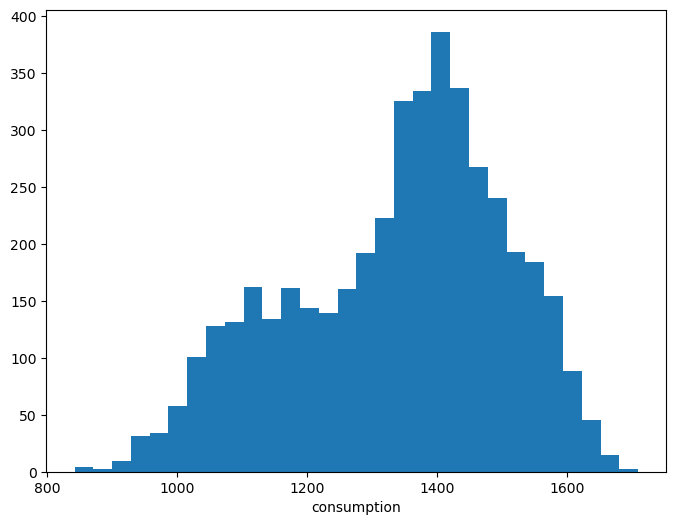

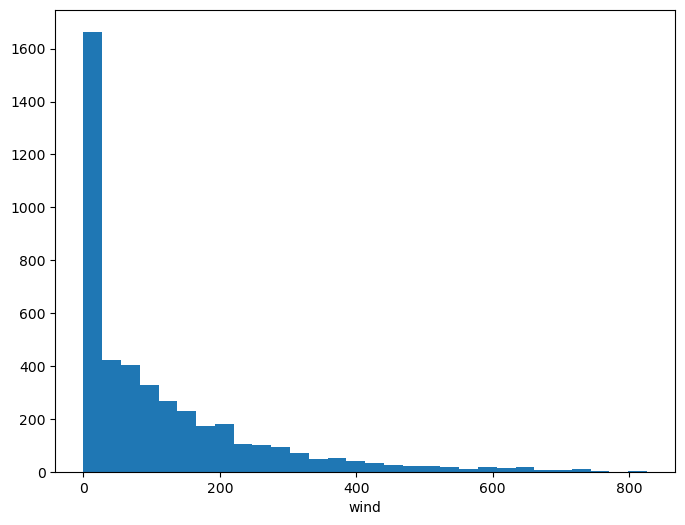

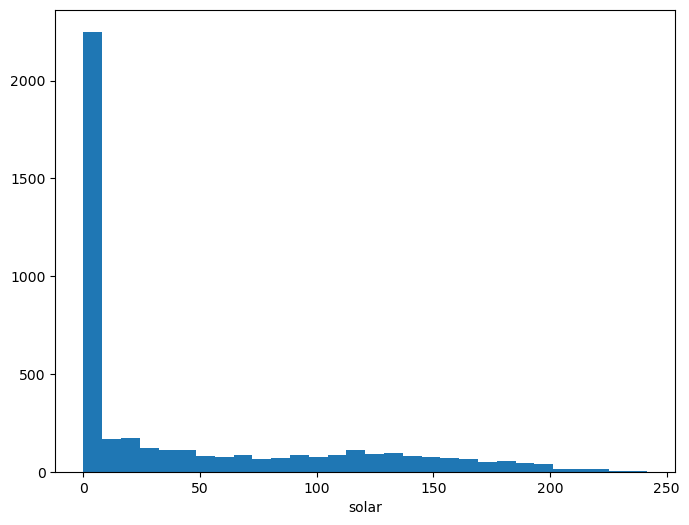

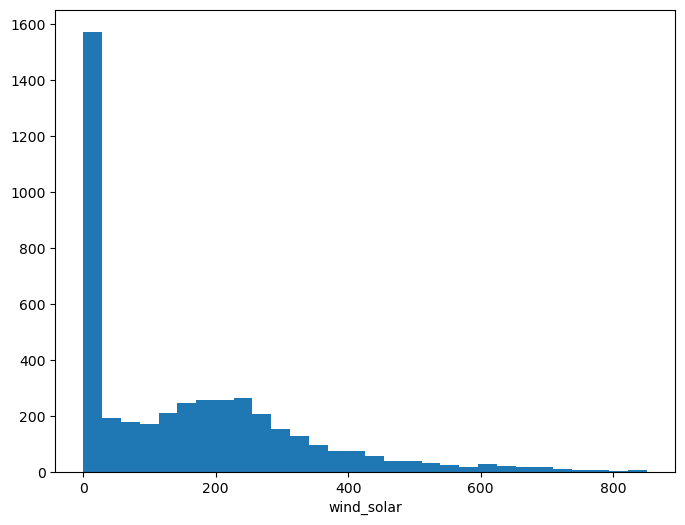

In [8]:
for col in power.columns:
    plt.figure(figsize=(8,6))
    plt.hist(power[col], bins=30)
    plt.xlabel(col)
    plt.show()

### 3. Set the index to be the datetime variable.

In [9]:
# Done above in function

### 4. Add a month and a year column to your dataframe.

In [10]:
def add_cols(df_one, name_dd=True, name_mm=True, year=True):
    df = df_one.copy()
    if name_dd:
        df['day_of_week'] = df.index.day_name()
    if name_mm:
        df['month'] = df.index.month_name()
    if year:
        df['year'] = df.index.year
    return df

In [11]:
power = add_cols(power, name_dd=False)
power.head()

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


### 5. Fill any missing values.

In [12]:
power.resample('y').mean().head(20)

/var/folders/m4/_r30hp156kj90s9_qf1t1zvc0000gn/T/ipykernel_84535/1315037977.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  power.resample('y').mean().head(20)


,consumption,wind,solar,wind_solar,year
date,,,,,
2006-12-31,1339.913797,0.000000,0.000000,0.000000,2006.0
2007-12-31,1360.635197,0.000000,0.000000,0.000000,2007.0
2008-12-31,1354.018787,0.000000,0.000000,0.000000,2008.0
2009-12-31,1259.554597,0.000000,0.000000,0.000000,2009.0
2010-12-31,1338.599178,98.388430,0.000000,98.388430,2010.0
2011-12-31,1328.257770,120.638222,0.000000,120.638222,2011.0
2012-12-31,1282.991131,125.307833,76.194896,201.502730,2012.0
2013-12-31,1269.416036,129.309129,80.985699,210.294827,2013.0
2014-12-31,1381.273482,140.021019,89.036458,229.057477,2014.0


Based off the promp for the previous acquisition exercises, I have concluded that solar and wind are the power generated in the country and it must have been implemented in 2010 and 2012 so the nulls likely indicate no power produced.

In [13]:
power = power.fillna(0)

In [14]:
power.wind_solar = power.wind + power.solar

In [15]:
power.resample('y').mean().head(20)

/var/folders/m4/_r30hp156kj90s9_qf1t1zvc0000gn/T/ipykernel_84535/1315037977.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  power.resample('y').mean().head(20)


,consumption,wind,solar,wind_solar,year
date,,,,,
2006-12-31,1339.913797,0.000000,0.000000,0.000000,2006.0
2007-12-31,1360.635197,0.000000,0.000000,0.000000,2007.0
2008-12-31,1354.018787,0.000000,0.000000,0.000000,2008.0
2009-12-31,1259.554597,0.000000,0.000000,0.000000,2009.0
2010-12-31,1338.599178,98.388430,0.000000,98.388430,2010.0
2011-12-31,1328.257770,120.638222,0.000000,120.638222,2011.0
2012-12-31,1282.991131,125.307833,76.194896,201.502730,2012.0
2013-12-31,1269.416036,129.309129,80.985699,210.294827,2013.0
2014-12-31,1381.273482,140.021019,89.036458,229.057477,2014.0


In [16]:
power = pd.read_csv('opsd_germany_daily.csv')
power = create_index(power, 'date')
power.head()

,consumption,wind,solar,wind_solar
date,,,,
2006-01-01,1069.184,0.0,0.0,0.0
2006-01-02,1380.521,0.0,0.0,0.0
2006-01-03,1442.533,0.0,0.0,0.0
2006-01-04,1457.217,0.0,0.0,0.0
2006-01-05,1477.131,0.0,0.0,0.0


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [17]:
import prepare as prep
import acquire as ac

In [18]:
ac.get_opds()

,date,consumption,wind,solar,wind_solar
0,2006-01-01,1069.18400,0.000,0.000,0.000
1,2006-01-02,1380.52100,0.000,0.000,0.000
2,2006-01-03,1442.53300,0.000,0.000,0.000
3,2006-01-04,1457.21700,0.000,0.000,0.000
4,2006-01-05,1477.13100,0.000,0.000,0.000
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
